# Creating a Neural Network with Insurance data

In [2]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging

# Loading the Data

In [53]:
def smoker(s):
    if s == b"no":
        return 0
    else:
        return 1

def region(r):
    if (r == b"northeast"):
        return 0
    elif (r == b"northwest"):
        return 1
    elif (r == b"southeast"):
        return 2
    elif (r == b"southwest"):
        return 3

def load_data():
    conv = {
        1: lambda x: 0 if x == b"female" else 1,
        4: lambda x: smoker(x),
        5: lambda x: region(x),
    }
    data = np.loadtxt("../data/insurance.csv", delimiter=',', skiprows=1, converters=conv)

    X = data[:,:-1]
    y = data[:,-1]
    return X, y

def split_data(data, arr):
    res = np.array_split(data, arr)
    return res[0], res[1], res[2]

X, y = load_data()
y_train = np.expand_dims(y, 1)

m, n = X.shape
X_train, X_cv, X_test = split_data(X, [round(m * 0.6), round(m * 0.8)])
y_train, y_cv, y_test = split_data(y, [round(m * 0.6), round(m * 0.8)])

# Creating the Neural Network

In [58]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
X_norm = norm_l(X_train)

model = Sequential(
    [
        tf.keras.Input(shape=(6,)),
        Dense(12, activation='relu', name = 'layer1'),
        Dense(24, activation='relu', name = 'layer2'),
        Dense(3, activation='relu', name = 'layer3'),
        Dense(1, activation='linear', name = 'layer4')
     ]
)

model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
)

res = model.fit(
    X_norm,
    y_train,            
    epochs=100,
)

print(res)


Epoch 1/100
26/26 [==============================] - 0s 632us/step - loss: 316373312.0000
Epoch 2/100
26/26 [==============================] - 0s 631us/step - loss: 313921856.0000
Epoch 3/100
26/26 [==============================] - 0s 735us/step - loss: 293563072.0000
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 210550496.0000
Epoch 5/100
26/26 [==============================] - 0s 620us/step - loss: 75269384.0000
Epoch 6/100
26/26 [==============================] - 0s 605us/step - loss: 36702676.0000
Epoch 7/100
26/26 [==============================] - 0s 552us/step - loss: 33614192.0000
Epoch 8/100
26/26 [==============================] - 0s 636us/step - loss: 33209630.0000
Epoch 9/100
26/26 [==============================] - 0s 559us/step - loss: 32833426.0000
Epoch 10/100
26/26 [==============================] - 0s 595us/step - loss: 32673850.0000
Epoch 11/100
26/26 [==============================] - 0s 633us/step - loss: 32424476.0000
Epoch 12/100
26/2

In [64]:
predictions_train = model.predict(X_norm)
predictions_cv = model.predict(X_cv)
predictions_test = model.predict(X_test)
m = len(predictions_train)
differences = 0

for i, p in enumerate(predictions_train):
    differences += abs(p - y_train[i])

print(differences / m)

9/9 [==============================] - 0s 560us/step
[2549.936]


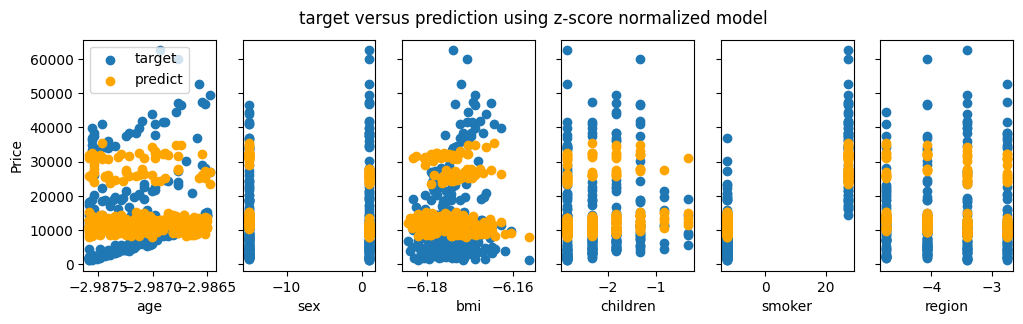

In [67]:
X_features = ['age','sex','bmi','children','smoker','region']
X_test = norm_l(X_test)
w = model.get_weights()
#predict target using normalized features
m = X_test.shape[0]
yp = np.zeros(m)
for i, p in enumerate(predictions_test):
    yp[i] = p

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,6,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test[:,i],y_test, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_test[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [70]:
J_train = tf.keras.losses.mean_squared_error(y_test, predictions_train)
J_cv = tf.keras.losses.mean_squared_error(y_test, predictions_cv)
J_test = tf.keras.losses.mean_squared_error(y_test, predictions_test)
tf.print(tf.math.reduce_mean(J_train))
tf.print(tf.math.reduce_mean(J_cv))
tf.print(tf.math.reduce_mean(J_test))

271479744
1.8100999e+11
214202320
